# 임포트

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
np.random.seed(seed=0)

# 데이터 준비

## 데이터 로드하기

In [2]:
!wget https://github.com/Chanmi-K/Python/raw/main/Data/Reviews_100000.zip

--2022-07-11 03:15:57--  https://github.com/Chanmi-K/Python/raw/main/Data/Reviews_100000.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Chanmi-K/Python/main/Data/Reviews_100000.zip [following]
--2022-07-11 03:15:57--  https://raw.githubusercontent.com/Chanmi-K/Python/main/Data/Reviews_100000.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17568832 (17M) [application/zip]
Saving to: ‘Reviews_100000.zip’

Reviews_100000.zip  100%[===================>]  16.75M  --.-KB/s    in 0.1s    

2022-07-11 03:15:58 (144 MB/s) - ‘Reviews_100000.zip’ saved [17568832/17568832]



In [3]:
!unzip Reviews_100000.zip

Archive:  Reviews_100000.zip
  inflating: Reviews.csv             


In [4]:
data = pd.read_csv('Reviews.csv', encoding='cp949')
print(len(data))

100000


In [5]:
data.head()

,Summary,Text
0,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...


Text : 원문, Summary : 요약

## 데이터 정제하기

In [6]:
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['Summary'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 88426
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 72348


중복이 1200여개가 있다.

In [7]:
# text 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['Text'], inplace=True)
print('전체 샘플 수 :', len(data))

전체 샘플 수 : 88426


In [8]:
# Null 값 존재 확인
print(data.isnull().sum())

Summary    1
Text       0
dtype: int64


In [9]:
# Null 값 제거
data.dropna(axis=0, inplace=True)
print('전체 샘플 수 :', len(data))

전체 샘플 수 : 88425


동일한 의미를 가졌지만 스펠링이 다른 단어들을 정규화 하기 위한 사전 정의

In [10]:
# 전처리 함수 내 사용
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [11]:
# NLTK의 불용어
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print('불용어 개수 :', len(stop_words))
print(stop_words)

불용어 개수 : 179
{"you've", 'because', 'can', "she's", 'these', 'my', 'out', 'mightn', 'more', 'such', "wasn't", 'for', 'o', "won't", 'herself', 'after', "weren't", 'this', 'above', 'on', 'she', 'from', 'not', 'its', "haven't", 'whom', 'down', 'doesn', "aren't", 'has', 'few', 'here', 'or', 're', 'couldn', 'in', "didn't", 'mustn', 'had', 'then', 'further', 'them', 'by', 'her', 'been', 'an', 'their', 'between', 'themselves', 'll', 'to', "you'll", 'doing', 'over', 'most', 'are', 'shan', 'wasn', 'won', 'ain', 'itself', 'he', 'now', 'were', 's', "doesn't", 'shouldn', "should've", 'and', 'under', 'any', "it's", 'as', 'ma', 'what', 'very', 'm', 'hadn', 'ourselves', 'up', "isn't", 'about', 'hasn', 'was', "you'd", "needn't", 'just', 'if', 'there', "don't", 'below', 'didn', 'yourself', 'until', "mustn't", 'own', 'off', "hadn't", 'be', 'with', 'some', 'yours', 'having', 'at', 'have', 'haven', 'aren', 'his', 'into', 'yourselves', 'that', 'your', 'through', "couldn't", 'when', 'himself', 'don', 'each',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
#전처리 함수 설계
def preprocess_sentence(sentence, remove_stopwords = True):
  sentence = sentence.lower()   # 텍스트 소문자화
  sentence = BeautifulSoup(sentence, 'lxml').text   # html 태그 제거
  sentence = re.sub(r'\([^)]*\)', '', sentence)   # 괄호로 닫힌 문자열 제거
  sentence = re.sub('"', '', sentence)    # 쌍따옴표 "" 제거
  sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")])   # 약어 정규화
  sentence = re.sub(r"'s\b", "", sentence)    # 소유격 제거
  sentence = re.sub("[^a-zA-Z]", " ", sentence)   # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
  sentence = re.sub('[m]{2,}', 'mm', sentence)    # m이 3개 이상이면 2개로 변경

  # 불용어 제거 (Text)
  if remove_stopwords:
    tokens = ' '.join(word for word in sentence.split() if not word in stop_words if len(word) > 1)
  # 불용어 미제거 (Summary)
  else:
    tokens = ' '.join(word for word in sentence.split() if len(word) > 1)

  return tokens

In [13]:
clean_text = []
for s in data['Text']:
  clean_text.append(preprocess_sentence(s))

#5개의 전처리된 샘플 출력
clean_text[:5]

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']

In [14]:
clean_summary = []
for s in data['Summary']:
  clean_summary.append(preprocess_sentence(s, 0))

#5개의 전처리된 샘플 출력
clean_summary[:5]

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.amazon.com/gp/product/b007i7yygy/ref=cm_cr_rev_prod_title" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


['good quality dog food',
 'not as advertised',
 'delight says it all',
 'cough medicine',
 'great taffy']

In [15]:
#전처리 후의 결과를 다시 데이터프레임에 저장
data['Text'] = clean_text
data['Summary'] = clean_summary

In [16]:
# 혹시 전처리 과정에서 빈 값이 생겼다면 Null 값으로 변경한 후 Null 값을 가진 샘플이 생겼는지 확인
data.replace('', np.nan, inplace=True)
print(data.isnull().sum())

Summary    69
Text        0
dtype: int64


In [17]:
# Null 값 제거
data.dropna(axis = 0, inplace=True)
print('전체 샘플 수 :', len(data))

전체 샘플 수 : 88356


텍스트의 최소 길이 : 2
텍스트의 최대 길이 : 1235
텍스트의 평균 길이 : 38.79221558241659
요약의 최소 길이 : 1
요약의 최대 길이 : 28
요약의 평균 길이 : 4.010695368735569


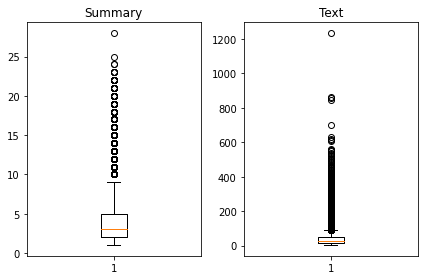

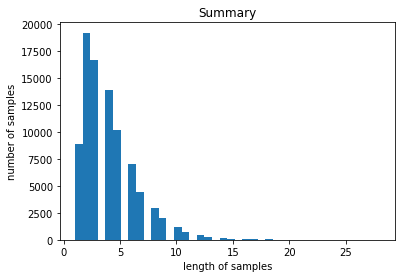

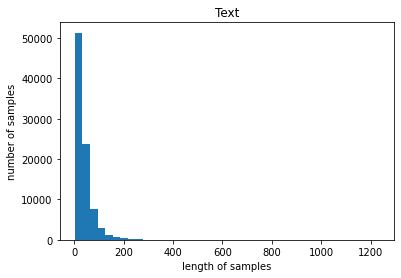

In [18]:
#각 열에 대한 길이 분포 확인
text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(summary_len)
plt.title('Summary')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

원문 텍스트는 대체로 100 이하의 길이. 평균 38

요약문은 대체로 15 이하의 길이. 평균 4

패딩의 길이는 평균 길이보다 크게 잡아 각각 50과 8로 결정

In [19]:
text_max_len = 50
summary_max_len = 8

In [20]:
# 전체 샘플 중 결정한 길이 이하인 샘플 비율 확인
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
      cnt += 1
  print(f'전체 샘플 중 길이가 {max_len} 이하인 샘플의 비율 : {(cnt/len(nested_list))}')

In [21]:
# Text 열
below_threshold_len(text_max_len, data['Text'])
# Summary 열
below_threshold_len(summary_max_len, data['Summary'])

전체 샘플 중 길이가 50 이하인 샘플의 비율 : 0.7745144642129567
전체 샘플 중 길이가 8 이하인 샘플의 비율 : 0.9424600479876862


In [22]:
# 정해준 최대 길이보다 큰 샘플들 제거
data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플 수 :', len(data))

전체 샘플 수 : 65819


seq2seq 훈련을 위해서는 디코더의 입력과 레이블에 시작 토큰과 종료 토큰을 추가할 필요가 있다.

시작 토큰은 'sostoken', 종료 토큰은 'eostoken' 이라 명명하고 앞, 뒤로 추가한다

In [23]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가
data['decoder_input'] = data['Summary'].apply(lambda x: 'sostoken ' + x)
data['decoder_target'] = data['Summary'].apply(lambda x: x + ' eostoken')
data.head()

,Summary,Text,decoder_input,decoder_target
0,good quality dog food,bought several vitality canned dog food produc...,sostoken good quality dog food,good quality dog food eostoken
1,not as advertised,product arrived labeled jumbo salted peanuts p...,sostoken not as advertised,not as advertised eostoken
2,delight says it all,confection around centuries light pillowy citr...,sostoken delight says it all,delight says it all eostoken
3,cough medicine,looking secret ingredient robitussin believe f...,sostoken cough medicine,cough medicine eostoken
4,great taffy,great taffy great price wide assortment yummy ...,sostoken great taffy,great taffy eostoken


In [24]:
# 인코더의 입력, 디코더의 입력과 레이블을 각각 저장
encoder_input = np.array(data['Text'])
decoder_input = np.array(data['decoder_input'])
decoder_target = np.array(data['decoder_target'])

## 데이터 분리

In [25]:
# 인덱스 순서 섞기
index = np.arange(encoder_input.shape[0])
np.random.shuffle(index)
print(index)

[29546 43316 24839 ... 45891 42613 43567]


In [26]:
# 샘플 순서 섞기
encoder_input = encoder_input[index]
decoder_input = decoder_input[index]
decoder_target = decoder_target[index]

In [27]:
# 8:2 비율로 훈련 데이터와 테스트 데이터 분리
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 13163


In [28]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

In [29]:
print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 52656
훈련 레이블의 개수 : 52656
테스트 데이터의 개수 : 13163
테스트 레이블의 개수 : 13163


## 정수 인코딩

기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터에 정수 인코딩 수행

훈련 데이터에 대해서 단어 집합을 만들어보자

In [30]:
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

src_tokenizer.word_index 에 저장

빈도수 낮은 단어들은 자연어 처리에서 배제하고자 한다

등장 빈도수가 7회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인해보자

In [31]:
threshold = 7 
total_cnt = len(src_tokenizer.word_index)   # 단어의 수
rare_cnt = 0    # 등장 빈도수가 threshold 보다 작은 단어의 개수를 카운트
total_freq = 0    # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0   # 등장 빈도수가 threshold 보다 작은 단어의 등장 빈도수 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다
for key, value in src_tokenizer.word_counts.items():
  total_freq += value

  # 단어의 등장 빈도수가 threshold 보다 작으면
  if(value < threshold):
    rare_cnt += 1
    rare_freq += value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 31991
등장 빈도가 6번 이하인 희귀 단어의 수: 23747
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 8244
단어 집합에서 희귀 단어의 비율: 74.23025225844769
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.393150889786152


등장 빈도가 threshold 값인 7회 미만, 즉 6회 이하인 단어들은 단어 집합에서 무려 70% 이상을 차지한다

하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 적은 수치인 3.39% 밖에 되지 않는다

여기서는 등장 빈도가 6회 이하인 단어들은 정수 인코딩 과정에서 배제시키고자 한다

위에서 이를 제외한 단어 집합의 크기를 8240으로 계산했는데, 여기서는 8000으로 제한하겠다

In [32]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words = src_vocab)
src_tokenizer.fit_on_texts(encoder_input_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

In [33]:
# 정수 인코딩이 정상 진행 되었는지 확인
print(encoder_input_train[:3])

[[394, 2651, 1393, 39, 23, 92, 36, 56, 5259, 1661, 341, 92, 339, 315, 766, 35, 305, 175, 1847, 1141, 57, 587, 1, 104, 7, 194, 85, 3734], [262, 698, 1662, 5, 2931, 524, 8, 112, 1196, 609, 48, 2, 85, 609, 2577, 115, 42, 5, 1, 609, 91, 57], [232, 373, 2652, 306, 27, 17, 140, 1103, 2800, 366, 140]]


In [34]:
# 레이블에 해당하는 요약 데이터도 변환 수행
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

등장 빈도수가 6회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인해보자

In [35]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index)   # 단어의 수
rare_cnt = 0    # 등장 빈도수가 threshold 보다 작은 단어의 개수를 카운트
total_freq = 0    # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0   # 등장 빈도수가 threshold 보다 작은 단어의 등장 빈도수 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다
for key, value in tar_tokenizer.word_counts.items():
  total_freq += value

  # 단어의 등장 빈도수가 threshold 보다 작으면
  if(value < threshold):
    rare_cnt += 1
    rare_freq += value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 10573
등장 빈도가 5번 이하인 희귀 단어의 수: 8174
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 2399
단어 집합에서 희귀 단어의 비율: 77.31012957533339
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.8824288738575925


등장 빈도가 5회 이하인 단어들은 단어 집합에서 약 77% 차지.

하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 적은 수치인 5.85% 밖에 되지 않는다

이 단어들은 정수 인코딩 과정에서 배제시키겠다

In [36]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words = tar_vocab)
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

In [37]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

In [38]:
# 정수 인코딩이 정상 진행되었는지 확인
print(decoder_input_train[:5])
print(decoder_target_train[:5])

[[1, 173, 82, 790, 188], [1, 17, 497, 420, 48], [1, 791], [1, 15, 108, 195], [1, 1554, 467, 431]]
[[173, 82, 790, 188, 2], [17, 497, 420, 48, 2], [791, 2], [15, 108, 195, 2], [1554, 467, 431, 2]]


## 빈 샘플 제거

빈도수가 낮은 단어만으로 구성된 샘플들은 이제 빈 샘플이 되었다

요약문에서 길이가 0이 된 샘플들의 인덱스를 받아오자

지금 요약문에는 시작, 종료 토큰이 추가되었기 때문에 길이가 0인 요약문의 실질적 길이는 1이다

In [39]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

In [40]:
print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

삭제할 훈련 데이터의 개수 : 1250
삭제할 테스트 데이터의 개수 : 348


In [41]:
# 삭제 후의 개수
encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 51406
훈련 레이블의 개수 : 51406
테스트 데이터의 개수 : 12815
테스트 레이블의 개수 : 12815


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


## 패딩하기

In [42]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen = text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')

decoder_input_train = pad_sequences(decoder_input_train, maxlen = summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen = summary_max_len, padding='post')

decoder_target_train = pad_sequences(decoder_target_train, maxlen = summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen = summary_max_len, padding='post')

# seq2seq 요약 모델 설계 및 훈련

## 임포트

In [43]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## 인코더 설계

LSTM 층 3개

In [44]:
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

## 디코더 설계 (출력층 제외)

초기 상태를 인코더의 상태를 주어야 함

In [45]:
# 디코더
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

## 디코더의 출력층 설계 어텐션

어텐션 메커니즘 결합된 새로운 출력층 설계

In [46]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/20.%20Text%20Summarization%20with%20Attention/attention.py", filename="attention.py")
from attention import AttentionLayer

In [47]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션 결과와 디코더의 hidden state 들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

## 모델 정의

In [48]:
# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 128)      1024000     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 50, 256),    394240      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

## 모델 컴파일, 학습

In [49]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [50]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, 
                    validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
                    batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
201/201 [==============================] - 150s 679ms/step - loss: 2.7024 - val_loss: 2.4062
Epoch 2/50
201/201 [==============================] - 135s 670ms/step - loss: 2.3775 - val_loss: 2.2772
Epoch 3/50
201/201 [==============================] - 136s 678ms/step - loss: 2.2458 - val_loss: 2.1721
Epoch 4/50
201/201 [==============================] - 136s 677ms/step - loss: 2.1331 - val_loss: 2.0716
Epoch 5/50
201/201 [==============================] - 137s 682ms/step - loss: 2.0454 - val_loss: 2.0186
Epoch 6/50
201/201 [==============================] - 137s 680ms/step - loss: 1.9786 - val_loss: 1.9786
Epoch 7/50
201/201 [==============================] - 139s 691ms/step - loss: 1.9273 - val_loss: 1.9504
Epoch 8/50
201/201 [==============================] - 137s 681ms/step - loss: 1.8830 - val_loss: 1.9281
Epoch 9/50
201/201 [==============================] - 137s 681ms/step - loss: 1.8449 - val_loss: 1.9084
Epoch 10/50
201/201 [==============================] - 137s 684m

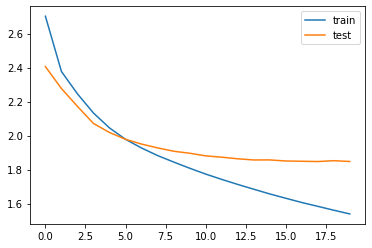

In [51]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# seq2seq 로 요약 모델 테스트하기

In [52]:
# 테스트를 위해 필요한 3개의 사전을 만든다
src_index_to_word = src_tokenizer.index_word  # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index  # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word  # 요약 단어 집합에서 정수 -> 단어를 얻음

seq2seq는 훈련 단계와 테스트 단계의 동작이 다르므로 테스트 단계의 모델을 별도로 다시 설계해줄 필요가 있다

다시 새로운 seq2seq 모델을 만들자

## 인코더 설계

In [53]:
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

## 테스트 단계의 디코더 설계

In [54]:
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat)

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

## 테스트를 위해 사용되는 함수 설계

In [55]:
def decode_sequence(input_seq):
  # 입력으로부터 인코더의 상태를 얻음
  e_out, e_h, e_c = encoder_model.predict(input_seq)

  # <sos> 에 해당하는 토큰 생성
  target_seq = np.zeros((1,1))
  target_seq[0,0] = tar_word_to_index['sostoken']

  stop_condition = False
  decoded_sentence = ''
  
  while not stop_condition: #stop_condition이 True가 될 때까지 루프 반복
    output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    sampled_token = tar_index_to_word[sampled_token_index]

    if (sampled_token != 'eostoken'):
      decoded_sentence += ' '+sampled_token

    # <eos>에 도달하거나 최대 길이를 넘으면 중단
    if (sampled_token == 'eostoken' or len(decoded_sentence.split()) >= (summary_max_len-1)):
      stop_condition = True

    # 길이가 1인 타겟 시퀀스를 업데이트
    target_seq = np.zeros((1,1))
    target_seq[0,0] = sampled_token_index

    # 상태를 업데이트
    e_h, e_c = h, c

  return decoded_sentence

테스트 단계에서 원문과 실제 요약문, 예측 요약문을 비교하기 위해 정수 시퀀스를 텍스트 시퀀스로 만드는 함수를 설계

In [56]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
  sentence=''
  for i in input_seq:
    if (i != 0):
      sentence = sentence + src_index_to_word[i] + ' '
  return sentence

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
  sentence=''
  for i in input_seq:
    if ((i != 0 and i != tar_word_to_index['sostoken']) and i != tar_word_to_index['eostoken']):
      sentence = sentence + tar_index_to_word[i] + ' '
  return sentence

## 테스트

In [57]:
# 테스트 샘플 중 5개만 테스트
for i in range(600, 605):
  print('원문 :', seq2text(encoder_input_test[i]))
  print('실제 요약문 :', seq2summary(decoder_input_test[i]))
  print('예측 요약문 :', decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
  print('\n')

원문 : excellent healthy training high value treats dogs love good handle hydrating like come various versions 
실제 요약문 : excellent treat 
예측 요약문 :  great training treats


원문 : bought bag dispenser turned use took refills company made dispenser unacceptable makes excellent bags put excellent dispenser find cap little hard get expect ages bit perhaps intended give longer useful life btw dog bags use daily cat litter box 
실제 요약문 : convenient and easy to use 
예측 요약문 :  great product


원문 : getting hard find discs limited types coffee like gevalia better maxwell house gevalia bitter 
실제 요약문 : best decaf 
예측 요약문 :  great coffee


원문 : product great daughter extremely pick loves also gluten free actually bad calories per serving great dish take thanksgiving dinner 
실제 요약문 : awesome corn cake 
예측 요약문 :  great product


원문 : taste like cough syrup reviewer stated best gum highly recommend plant live austin tx bought pack san ordered box amazon lemon best flavors orbit makes john 
실제 요약문 : tastes